# GTHA housing market database
# OSEMN methodology Step 2: Scrub
# Step 2.2 Correction of inconsistent entries in the Teranet dataset

---

This notebook describes Step 2.2 (part of _Step 2: Scrub_ of OSEMN methodology) performed on the Teranet dataset.

Step 2.2 focuses on the correction of inconsistent entries in the Teranet dataset. Cleanup plan is presented below.

Previous steps included: 

* Step 2.1 

    * the spatial join between the Teranet points and the polygons of GTHA Dissemination Areas (DAs)
    
    * During step 2.1, Teranet records whose coordinates fall outside of the GTHA boundary (as defined by the DA geometry) have been filtered out (6,803,691 of the original 9,039,241 Teranet records remain in the dataset)
     
    * In addition to that, three new columns (`OBJECTID`, `DAUID`, and `CSDNAME`) derived from DA attributes have been added to each Teranet transaction

---

For description of OSEMN methodology, see `methodology/0.osemn/osemn.pdf`.

For background information, description of the Teranet dataset, and its attributes, see `methodology/1.obtain/obtain.pdf`.

For description of _Step 2: Scrub_ of OSEMN methodology, see `methodology/2.scrub/scrub.pdf`.

For description of the cleanup plan for the Teranet dataset, see `methodology/2.scrub/teranet_cleanup_plan.pdf`.

For description of Step 2.1 of the cleanup process, see `notebooks/2.scrub/2.1_teranet_gtha_spatial_join.ipynb`.

## Cleanup plan

1. Convert column names to lower case
2. Fix inconsistent capitalizations for values in columns:
    * `municipality`
    * `street_name`
    * `street_designation`
    * `postal_code` (do not show problems, preventive measure)
3. Remove column `province`
4. Parse `postal_code` from `street_name`
5. Parse `street_direction` from `street_name`
6. Parse `street_designation` from `street_name`
7. Investigate missing values
8. Remove column `street_suffix`
9. Validate consistency of values in column `postal_code`
8. Fix inconsistent entries in columns:
    * `unitno`
    * `street_name`
    * `street_designaction`
    * `street_direction`
    * `municipality`

## Import dependencies

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from time import time

sns.set()

In [2]:
data_path = '../../data/teranet/'
os.listdir(data_path)

['Teranet_with_DA_cols.csv', 'HHSaleHistory.csv']

## Load Teranet data

In [3]:
t = time()
#df = pd.read_csv(data_path + 'Teranet_with_DA_cols.csv',
#                 parse_dates=['registration_date'])
df = pd.read_csv(data_path + 'Teranet_with_DA_cols.csv')
elapsed = time() - t
print("----- DataFrame loaded"
      "\nin {0:.2f} seconds".format(elapsed) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(df.shape[0], df.shape[1]) + 
      "\n-- Column names:\n", df.columns)

/home/stepan/anaconda3/envs/gds/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


----- DataFrame loaded
in 20.27 seconds
with 6,803,691 rows
and 18 columns
-- Column names:
 Index(['lro_num', 'pin', 'consideration_amt', 'registration_date',
       'POSTAL_CODE', 'PROVINCE', 'UNITNO', 'STREET_NAME',
       'STREET_DESIGNATION', 'STREET_DIRECTION', 'MUNICIPALITY',
       'STREET_SUFFIX', 'STREET_NUMBER', 'X', 'Y', 'OBJECTID', 'DAUID',
       'CSDNAME'],
      dtype='object')


## Step 1: convert column names to lower case

In [4]:
df.columns = df.columns.str.lower()
df.columns

Index(['lro_num', 'pin', 'consideration_amt', 'registration_date',
       'postal_code', 'province', 'unitno', 'street_name',
       'street_designation', 'street_direction', 'municipality',
       'street_suffix', 'street_number', 'x', 'y', 'objectid', 'dauid',
       'csdname'],
      dtype='object')

## Step 2: fix inconsistent capitalizations
Inconsistent capitalizations are fixed for values in the following columns: 
* `unitno`
* `street_name`
* `street_designaction`
* `street_direction`
* `municipality`

In [5]:
t = time()
df['municipality'] = df['municipality'].str.title()
df['street_name'] = df['street_name'].str.title()
df['street_designation'] = df['street_designation'].str.capitalize()
df['postal_code'] = df['postal_code'].str.upper()
elapsed = time() - t
print("Capitalizations were fixed! Took {0:,.2f} seconds.".format(elapsed))

Capitalizations were fixed! Took 10.97 seconds.


## Step 3: Remove column `province`

In [6]:
df = df.drop('province', axis=1)
print("Column 'province' was removed from the dataset.")

Column 'province' was removed from the dataset.


## Step 4: Parse `postal_code` from `street_name`
Some Teranet records with missing `postal_code` have it as part of their `street_name` value.

In [7]:
mask1 = df['street_name'].str.contains('[A-Z]\d[A-Z]\d[A-Z]\d', na=False, case=False)
df.loc[mask1, ['street_name', 'street_designation', 'postal_code', 'municipality']]

,street_name,street_designation,postal_code,municipality
112676,Stoutt Crescent L9T9A2,Cres,L9T9A2,Milton
112945,Stoutt Crescent L9T9A2,Cres,L9T9A2,Milton
427026,Dundas St E L0R2H1,NaN,NaN,Waterdown
428281,Dundas St E L0R2H1,NaN,NaN,Waterdown
738425,Orton Pk Road M1G3H2,NaN,NaN,Toronto
738513,Orton Pk Road M1G3H2,NaN,NaN,Toronto
960503,Vines Place L4G0R6,NaN,NaN,Aurora
996169,Thorncliffe Pk Drive M4H1P3,NaN,NaN,East York
996320,Thorncliffe Pk Drive M4H1P3,NaN,NaN,East York
996405,Overlea Boulevard M4H1P2,NaN,NaN,Toronto


### Extract `postal_code` from `street_name`

In [8]:
df.loc[mask1, 'postal_code'] = \
    df.loc[mask1, 'street_name'].str.split().apply(lambda x: x[-1])
df.loc[mask1, 'street_name'] = \
    df.loc[mask1, 'street_name'].str.rsplit(' ', 1).apply(lambda x: x[0]).str.strip()
df.loc[mask1, ['street_name', 'street_designation', 'postal_code', 'municipality']]

,street_name,street_designation,postal_code,municipality
112676,Stoutt Crescent,Cres,L9T9A2,Milton
112945,Stoutt Crescent,Cres,L9T9A2,Milton
427026,Dundas St E,NaN,L0R2H1,Waterdown
428281,Dundas St E,NaN,L0R2H1,Waterdown
738425,Orton Pk Road,NaN,M1G3H2,Toronto
738513,Orton Pk Road,NaN,M1G3H2,Toronto
960503,Vines Place,NaN,L4G0R6,Aurora
996169,Thorncliffe Pk Drive,NaN,M4H1P3,East York
996320,Thorncliffe Pk Drive,NaN,M4H1P3,East York
996405,Overlea Boulevard,NaN,M4H1P2,Toronto


## Step 5: Parse `unitno` from `street_name`
Some Teranet records with missing `unitno` have it as part of their `street_name` value.

In [9]:
mask1 = df['street_name'].str.contains('Unit', na=False, case=False)
mask2 = df['street_name'].str.contains('(Unity|Unita|United|Munition)', na=False, case=False)
df.loc[mask1 & ~mask2, ['unitno', 'street_name', 'street_designation', 'municipality']]

/home/stepan/anaconda3/envs/gds/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,unitno,street_name,street_designation,municipality
36607,NaN,"Speers Road, Unit 2006",NaN,Oakville
36609,NaN,"Speers Road, Unit 2006",NaN,Oakville
36610,NaN,"Speers Road, Unit 2006",NaN,Oakville
37024,NaN,"Speers Road, Unit 2006",NaN,Oakville
37026,NaN,"Speers Road, Unit 2006",NaN,Oakville
37027,NaN,"Speers Road, Unit 2006",NaN,Oakville
72967,NaN,"Preserve Drive, Unit 4",Dr,Oakville
72990,NaN,"Preserve Drive, Unit 13",Dr,Oakville
73064,NaN,"Sarah Cline Drive, Unit 4",Dr,Oakville
73068,NaN,"Ellen Davidson Drive, Unit 5",Dr,Oakville


### Extract `unitno` from `street_name`
#### Split by ','

In [10]:
mask1 = df['street_name'].str.contains('Unit', na=False, case=False)
mask2 = df['street_name'].str.contains('(Unity|Unita|United|Munition)', na=False, case=False)
mask3 = df['street_name'].str.contains(',')
df.loc[mask1 & ~mask2 & mask3, ['unitno', 'street_name', 'street_designation', 'municipality']]

/home/stepan/anaconda3/envs/gds/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,unitno,street_name,street_designation,municipality
36607,NaN,"Speers Road, Unit 2006",NaN,Oakville
36609,NaN,"Speers Road, Unit 2006",NaN,Oakville
36610,NaN,"Speers Road, Unit 2006",NaN,Oakville
37024,NaN,"Speers Road, Unit 2006",NaN,Oakville
37026,NaN,"Speers Road, Unit 2006",NaN,Oakville
37027,NaN,"Speers Road, Unit 2006",NaN,Oakville
72967,NaN,"Preserve Drive, Unit 4",Dr,Oakville
72990,NaN,"Preserve Drive, Unit 13",Dr,Oakville
73064,NaN,"Sarah Cline Drive, Unit 4",Dr,Oakville
73068,NaN,"Ellen Davidson Drive, Unit 5",Dr,Oakville


In [11]:
df.loc[mask1 & ~mask2 & mask3, 'unitno'] = \
    df.loc[mask1 & ~mask2 & mask3, 'street_name']\
    .str.split(',').apply(lambda x: x[-1]).str.replace('Unit', '').str.strip()
df.loc[mask1 & ~mask2 & mask3, 'street_name'] = \
    df.loc[mask1 & ~mask2 & mask3, 'street_name'].str.split(',')\
    .apply(lambda x: x[0]).str.strip()
df.loc[mask1 & ~mask2 & mask3, ['unitno', 'street_name', 'street_designation', 'municipality']]

,unitno,street_name,street_designation,municipality
36607,2006,Speers Road,NaN,Oakville
36609,2006,Speers Road,NaN,Oakville
36610,2006,Speers Road,NaN,Oakville
37024,2006,Speers Road,NaN,Oakville
37026,2006,Speers Road,NaN,Oakville
37027,2006,Speers Road,NaN,Oakville
72967,4,Preserve Drive,Dr,Oakville
72990,13,Preserve Drive,Dr,Oakville
73064,4,Sarah Cline Drive,Dr,Oakville
73068,5,Ellen Davidson Drive,Dr,Oakville


### Extract `unitno` from `street_name`
#### Split by '-'

In [12]:
mask1 = df['street_name'].str.contains('Unit', na=False, case=False)
mask2 = df['street_name'].str.contains('(Unity|Unita|United|Munition)', na=False, case=False)
mask3 = df['street_name'].str.contains('-')
df.loc[mask1 & ~mask2 & mask3, ['unitno', 'street_name', 'street_designation', 'municipality']]

/home/stepan/anaconda3/envs/gds/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,unitno,street_name,street_designation,municipality
931018,NaN,George Street - Parking Unit,St,Toronto
931757,NaN,George Street - Parking Unit,St,Toronto
933483,NaN,George Street - Parking Unit,St,Toronto
935165,NaN,George Street - Parking Unit,St,Toronto
935841,NaN,George Street - Parking Unit,St,Toronto
1561933,NaN,St. Joseph Street-Locker Unit,NaN,Toronto
1561934,NaN,St. Joseph Street-Locker Unit,NaN,Toronto
1561935,NaN,St. Joseph Street-Locker Unit,NaN,Toronto
1561936,NaN,St. Joseph Street-Locker Unit,NaN,Toronto
2146741,NaN,Bathurst Street-Storage Unit,NaN,Toronto


In [13]:
df.loc[mask1 & ~mask2 & mask3, 'unitno'] = \
    df.loc[mask1 & ~mask2 & mask3, 'street_name']\
    .str.split('-').apply(lambda x: x[-1])\
    .str.replace('Unit', '')\
    .str.replace('10', 'H-10').str.strip()
df.loc[mask1 & ~mask2 & mask3, 'street_name'] = \
    df.loc[mask1 & ~mask2 & mask3, 'street_name']\
    .str.split('-').apply(lambda x: x[0])\
    .str.replace('Unit H', '').str.strip()
df.loc[mask1 & ~mask2 & mask3, ['unitno', 'street_name', 'street_designation', 'municipality']]

,unitno,street_name,street_designation,municipality
931018,Parking,George Street,St,Toronto
931757,Parking,George Street,St,Toronto
933483,Parking,George Street,St,Toronto
935165,Parking,George Street,St,Toronto
935841,Parking,George Street,St,Toronto
1561933,Locker,St. Joseph Street,NaN,Toronto
1561934,Locker,St. Joseph Street,NaN,Toronto
1561935,Locker,St. Joseph Street,NaN,Toronto
1561936,Locker,St. Joseph Street,NaN,Toronto
2146741,Storage,Bathurst Street,NaN,Toronto


### Extract `unitno` from `street_name`
#### Split by '.'

In [14]:
mask1 = df['street_name'].str.contains('Unit', na=False, case=False)
mask2 = df['street_name'].str.contains('(Unity|Unita|United|Munition|St\.\sClair)', na=False, case=False)
mask3 = df['street_name'].str.contains('\.')
df.loc[mask1 & ~mask2 & mask3, ['unitno', 'street_name', 'street_designation', 'municipality']]

/home/stepan/anaconda3/envs/gds/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,unitno,street_name,street_designation,municipality
195536,NaN,Fairview St. Unit 77,St,Burlington
195537,NaN,Fairview St. Unit 77,St,Burlington
195538,NaN,Fairview St. Unit 77,St,Burlington
195652,NaN,Fairview St. Unit 77,St,Burlington
195653,NaN,Fairview St. Unit 77,St,Burlington
195654,NaN,Fairview St. Unit 77,St,Burlington
195961,NaN,Fairview St. Unit 77,St,Burlington
196053,NaN,Fairview St. Unit 77,St,Burlington
196259,NaN,Fairview St. Unit 77,St,Burlington
196260,NaN,Fairview St. Unit 77,St,Burlington


In [15]:
df.loc[mask1 & ~mask2 & mask3, 'unitno'] = \
    df.loc[mask1 & ~mask2 & mask3, 'street_name']\
    .str.split('.').apply(lambda x: x[-1])\
    .str.replace('Unit', '').str.strip()
df.loc[mask1 & ~mask2 & mask3, 'street_name'] = \
    df.loc[mask1 & ~mask2 & mask3, 'street_name']\
    .str.split('.').apply(lambda x: x[0]).str.strip()
df.loc[mask1 & ~mask2 & mask3, ['unitno', 'street_name', 'street_designation', 'municipality']]

,unitno,street_name,street_designation,municipality
195536,77,Fairview St,St,Burlington
195537,77,Fairview St,St,Burlington
195538,77,Fairview St,St,Burlington
195652,77,Fairview St,St,Burlington
195653,77,Fairview St,St,Burlington
195654,77,Fairview St,St,Burlington
195961,77,Fairview St,St,Burlington
196053,77,Fairview St,St,Burlington
196259,77,Fairview St,St,Burlington
196260,77,Fairview St,St,Burlington


### Extract `unitno` from `street_name`
#### Specified in (brackets)

In [16]:
mask1 = df['street_name'].str.contains('Unit', na=False, case=False)
mask2 = df['street_name'].str.contains('(Unity|Unita|United|Munition)', na=False, case=False)
mask3 = df['street_name'].str.contains('\(')
df.loc[mask1 & ~mask2 & mask3, ['unitno', 'street_name', 'street_designation', 'municipality']]

/home/stepan/anaconda3/envs/gds/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,unitno,street_name,street_designation,municipality
1004919,NaN,Yonge Street (Parking Unit),NaN,Aurora
2091131,NaN,Peter Street (Storage Unit),NaN,Toronto
2225579,NaN,Robinson Street (Dwelling Unit),NaN,Hamilton
3274178,NaN,Shuter Street (Storage Unit),NaN,Toronto
3555248,NaN,Abell Street (Parking Unit),NaN,Toronto
3836427,NaN,York Street (Parking Unit),St,Toronto
3839871,NaN,York Street (Parking Unit),St,Toronto
5035302,NaN,Powseland Crescent (Parking Unit),NaN,Vaughan
5035607,NaN,Powseland Crescent (Parking Unit),NaN,Vaughan
5035859,NaN,Powseland Crescent (Parking Unit),NaN,Vaughan


In [17]:
df.loc[mask1 & ~mask2 & mask3, 'unitno'] = \
    df.loc[mask1 & ~mask2 & mask3, 'street_name']\
    .str.split('(').apply(lambda x: x[-1]).str.replace(')', '')\
    .str.replace('Unit', '').str.strip()
df.loc[mask1 & ~mask2 & mask3, 'street_name'] = \
    df.loc[mask1 & ~mask2 & mask3, 'street_name'].str.split('(')\
    .apply(lambda x: x[0]).str.strip()
df.loc[mask1 & ~mask2 & mask3, ['unitno', 'street_name', 'street_designation', 'municipality']]

,unitno,street_name,street_designation,municipality
1004919,Parking,Yonge Street,NaN,Aurora
2091131,Storage,Peter Street,NaN,Toronto
2225579,Dwelling,Robinson Street,NaN,Hamilton
3274178,Storage,Shuter Street,NaN,Toronto
3555248,Parking,Abell Street,NaN,Toronto
3836427,Parking,York Street,St,Toronto
3839871,Parking,York Street,St,Toronto
5035302,Parking,Powseland Crescent,NaN,Vaughan
5035607,Parking,Powseland Crescent,NaN,Vaughan
5035859,Parking,Powseland Crescent,NaN,Vaughan


### Extract `unitno` from `street_name`
#### Specified at the end of the string

In [18]:
mask1 = df['street_name'].str.contains('Unit', na=False, case=False)
mask2 = df['street_name'].str.contains('(Unity|Unita|United|Munition)', na=False, case=False)
df.loc[mask1 & ~mask2, ['unitno', 'street_name', 'street_designation', 'municipality']]

/home/stepan/anaconda3/envs/gds/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,unitno,street_name,street_designation,municipality
911375,6,Nantucket Blvd Units 5,NaN,Toronto
911376,6,Nantucket Blvd Units 5,NaN,Toronto
2068778,NaN,Victoria Park Avenue Unit 1808,NaN,Toronto
2069011,NaN,Victoria Park Avenue Unit 1808,NaN,Toronto
2069392,NaN,Victoria Park Avenue Unit 1808,NaN,Toronto
2577606,NaN,Upper Wentworth Street Unit 21,NaN,Hamilton
2578003,NaN,Upper Wentworth Street Unit 21,NaN,Hamilton
2578004,NaN,Upper Wentworth Unit 13,NaN,Hamilton
2578207,NaN,Upper Wentworth Unit 13,NaN,Hamilton
2578264,NaN,Upper Wentworth Street Unit 21,NaN,Hamilton


In [19]:
df.loc[mask1 & ~mask2, 'unitno'] = \
    df.loc[mask1 & ~mask2, 'street_name']\
        .str.rsplit(' ', 2).apply(lambda x: x[-2:])\
        .apply(lambda x: ' '.join(x))\
        .str.replace('Unit', '')\
        .str.replace('s', 'Units')\
        .str.strip()
df.loc[mask1 & ~mask2, 'street_name'] = \
    df.loc[mask1 & ~mask2, 'street_name']\
        .str.rsplit(' ', 2).apply(lambda x: x[0]).str.strip()
df.loc[mask1 & ~mask2, ['unitno', 'street_name', 'street_designation', 'municipality']]

,unitno,street_name,street_designation,municipality
911375,Units 5,Nantucket Blvd,NaN,Toronto
911376,Units 5,Nantucket Blvd,NaN,Toronto
2068778,1808,Victoria Park Avenue,NaN,Toronto
2069011,1808,Victoria Park Avenue,NaN,Toronto
2069392,1808,Victoria Park Avenue,NaN,Toronto
2577606,21,Upper Wentworth Street,NaN,Hamilton
2578003,21,Upper Wentworth Street,NaN,Hamilton
2578004,13,Upper Wentworth,NaN,Hamilton
2578207,13,Upper Wentworth,NaN,Hamilton
2578264,21,Upper Wentworth Street,NaN,Hamilton


### Extract `unitno` from `street_name`
#### Other

In [59]:
mask1 = df['street_name'].str.contains('#', na=False, case=False)
mask2 = df['street_name'].str.contains('(Highway #|Hwy #)', na=False, case=False)
df.loc[mask1 & ~mask2, ['unitno', 'street_name', 'street_designation', 'municipality']]

/home/stepan/anaconda3/envs/gds/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,unitno,street_name,street_designation,municipality
51623,NaN,17Th Sideroad Rr#3,Side rd,Georgetown
51707,NaN,17Th Sideroad Rr#3,Side rd,Georgetown
51709,NaN,17Th Sideroad Rr#3,Side rd,Georgetown
51971,NaN,17Th Sideroad Rr#3,Side rd,Georgetown
51972,NaN,17Th Sideroad Rr#3,Side rd,Georgetown
52356,NaN,#5 Sideroad,Side rd,Milton
53272,NaN,#5 Sideroad,Side rd,Milton
70863,NaN,"Third Sideroad, R. R. # 2",NaN,Campbelleville
71250,NaN,"Third Sideroad, R. R. # 2",NaN,Campbelleville
111979,NaN,"32Nd Side Road, R.R.#1",Side rd,Acton


In [66]:
mask1 = df['street_name'].str.contains('(\sno\s|no\.)', na=False, case=False)
#mask2 = df['street_name'].str.contains('(Unity|Unita|United|Munition)', na=False, case=False)
df.loc[mask1, ['unitno', 'street_name', 'street_designation', 'municipality']]

/home/stepan/anaconda3/envs/gds/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,unitno,street_name,street_designation,municipality
19144,NaN,No. 2 Sideroad,Cres,Burlington
19235,NaN,No. 2 Sideroad,Cres,Burlington
52159,NaN,No. 5 Side Road,Line,Milton
52230,NaN,No. 5 Sideroad,Side rd,Milton
52313,NaN,No. 5 Sideroad,Side rd,Milton
52979,NaN,No. 5 Side Road,Line,Milton
53194,NaN,No. 5 Sideroad,Side rd,Milton
53195,NaN,No. 5 Sideroad,Side rd,Milton
53265,NaN,No. 5 Sideroad,Side rd,Milton
53624,NaN,No. 5 Side Road,Line,Milton


## Step 5: Parse `street_direction` from `street_name`
Some Teranet records with missing `street_direction` have it as part of their `street_name` value.

In [9]:
mask1 = df['street_name']\
    .str.contains('\s(W|E|N|S|W.|E.|N.|S.|West|East|North|South)$', na=False)
skip_list = ['The East', 'The West', 'Far North', 'John West']
mask2 = df['street_name'].isin(skip_list)
df.loc[mask1 & ~mask2, ['street_name', 'street_direction', 'street_designation', 'municipality']]

/home/stepan/anaconda3/envs/gds/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,street_name,street_direction,street_designation,municipality
3756,Steeles Ave W,NaN,NaN,Milton
3761,Steeles Avenue West,NaN,NaN,Milton
3792,Steeles Ave W,NaN,NaN,Milton
3831,Steeles Ave W,NaN,NaN,Milton
3867,Derry Road West,NaN,NaN,Milton
3870,Steeles Ave W,NaN,NaN,Milton
3985,Steeles Avenue West,NaN,NaN,Milton
3995,Steeles Avenue West,NaN,NaN,Milton
4052,Derry Road West,NaN,NaN,Milton
4076,Steeles Ave W,NaN,NaN,Milton


### Extract `street_direction` from `street_name`

In [10]:
df.loc[mask1, 'street_direction'] = \
    df.loc[mask1, 'street_name'].str.split().apply(lambda x: x[-1])
df.loc[mask1, 'street_name'] = \
    df.loc[mask1, 'street_name'].str.rsplit(' ', 1).apply(lambda x: x[0]).str.strip()
df.loc[mask1, ['street_name', 'street_direction', 'street_designation', 'postal_code', 'municipality']]

,street_name,street_direction,street_designation,postal_code,municipality
3756,Steeles Ave,W,NaN,NaN,Milton
3761,Steeles Avenue,West,NaN,NaN,Milton
3792,Steeles Ave,W,NaN,NaN,Milton
3831,Steeles Ave,W,NaN,NaN,Milton
3867,Derry Road,West,NaN,NaN,Milton
3870,Steeles Ave,W,NaN,NaN,Milton
3985,Steeles Avenue,West,NaN,NaN,Milton
3995,Steeles Avenue,West,NaN,NaN,Milton
4052,Derry Road,West,NaN,NaN,Milton
4076,Steeles Ave,W,NaN,NaN,Milton


## Step 6: Parse `street_designation` from `street_name`
For most Teranet records with missing `street_designation`, the street type is actually added to the column `street_name`.

In [30]:
mask1 = df['street_designation'].isnull()
mask2 = df['street_name'].isnull()
skip_list = ['Via Campanile', 'Alfred Paterson', 'Regional Road 25', 'Regional Rd 25',
             'Sixth Line Rr1']
mask3 = df['street_name'].isin(skip_list)
mask4 = df['street_name'].str.contains('Building', case=False, na=False)
df.loc[mask1 & ~mask2 & ~mask3 & ~mask4, ['street_name', 'street_designation', 'municipality']]

,street_name,street_designation,municipality
0,Mc Caul St,NaN,Toronto
6,University Ave,NaN,Toronto
8,Mc Caul St,NaN,Toronto
12,Murray St,NaN,Toronto
13,Mc Caul St,NaN,Toronto
14,University Ave,NaN,Toronto
18,Mc Caul St,NaN,Toronto
19,Mc Caul St,NaN,Toronto
20,College St,NaN,Toronto
21,Orde St,NaN,Toronto


## Step 7: Investigate missing values

In [7]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6803691 entries, 0 to 6803690
Data columns (total 17 columns):
lro_num               6803691 non-null int64
pin                   6803691 non-null int64
consideration_amt     6803691 non-null float64
registration_date     6803691 non-null object
postal_code           6233082 non-null object
unitno                1571830 non-null float64
street_name           6598317 non-null object
street_designation    6211313 non-null object
street_direction      653205 non-null object
municipality          6799681 non-null object
street_suffix         43 non-null float64
street_number         6594322 non-null float64
x                     6803691 non-null float64
y                     6803691 non-null float64
objectid              6803691 non-null int64
dauid                 6803691 non-null int64
csdname               6803691 non-null object
dtypes: float64(6), int64(4), object(7)
memory usage: 882.4+ MB


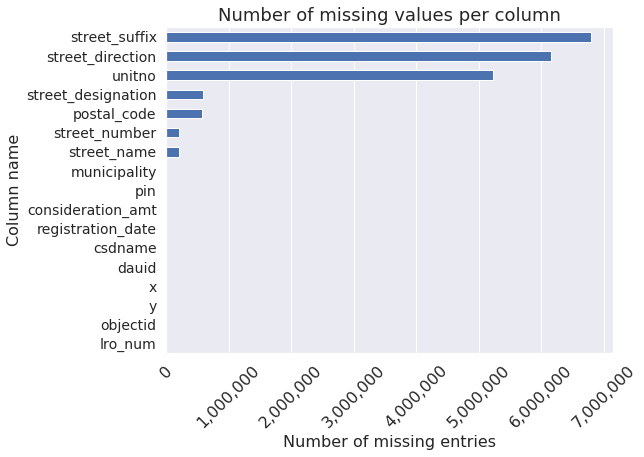

In [8]:
na_count = df.isnull().sum().sort_values()

f, ax = plt.subplots(1, figsize=(8, 6))
na_count.plot(kind='barh', ax=ax)
ax.grid(axis='y')
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=14)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title("Number of missing values per column", fontsize=18)
ax.set_ylabel("Column name", fontsize=16)
ax.set_xlabel("Number of missing entries", fontsize=16)
plt.savefig('results/teranet_na_count.png', dpi=400, bbox_inches='tight')

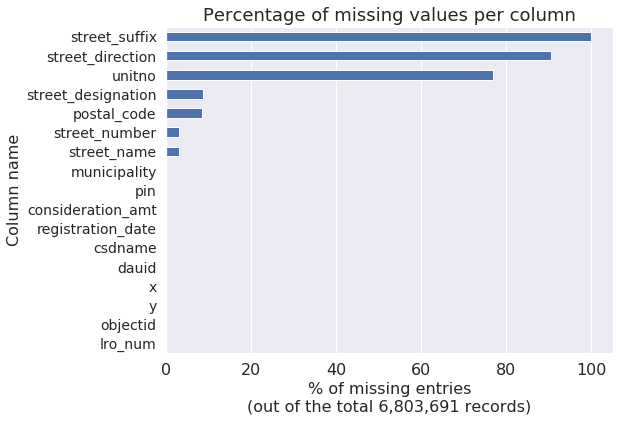

In [9]:
na_perc = df.isnull().sum().sort_values() / len(df) * 100

f, ax = plt.subplots(1, figsize=(8, 6))
na_perc.plot(kind='barh', ax=ax)
ax.grid(axis='y')
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title("Percentage of missing values per column", fontsize=18)
ax.set_ylabel("Column name", fontsize=16)
ax.set_xlabel("% of missing entries\n(out of the total {0:,} records)"
              .format(len(df)), fontsize=16)
plt.savefig('results/teranet_na_perc.png', dpi=400, bbox_inches='tight')

## Step 8: Remove column `street_suffix`
Since 99.99994% of the values in column `street_suffix` are missing, it has been removed from the dataset.

In [10]:
df = df.drop('street_suffix', axis=1)
print("Column 'street_suffix' was removed from the dataset.")

Column 'street_suffix' was removed from the dataset.


## Step 9: validate consistency of values in column `postal_code`
Column `postal_code` has been validated to contain the correct data format (Canadian postal codes).

570'609 values are missing, the rest follow the correct data format.

In [11]:
df['postal_code'].str.match('^[A-Z]\d[A-Z]\d[A-Z]\d$')\
    .value_counts(dropna=False)

True    6233082
NaN      570609
Name: postal_code, dtype: int64

## Step 10: fix inconsistent values
Inconsistent entries are fixed in the following columns:
* `unitno`
* `street_name`
* `street_designaction`
* `street_direction`
* `municipality`


### Fix values in column `unitno`

#### 1.010000e-107

In [12]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.contains('e')
mask2 = unit_no.str.match('1.01')
mask3 = unit_no.str.match('1.009')
df.loc[mask1 & (mask2 | mask3), 'unitno']

340618    1.010000e-107
Name: unitno, dtype: float64

In [13]:
df.loc[mask1 & (mask2 | mask3), 'unitno'] = 101
df.loc[mask1 & (mask2 | mask3), 'unitno']

340618    101.0
Name: unitno, dtype: float64

#### 1.200000e-/+x
>It is impossible to tell, if this erratic unit number corresponds to '12', '120', or '1200'. All units that match this pattern have been converted to '12'.

In [14]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.contains('e')
mask2 = unit_no.str.match('1.199')
df.loc[mask1 & mask2, 'unitno']

3953588    1.200000e-103
3953651    1.200000e-200
3953674    1.200000e-200
3953742    1.200000e-200
3953776    1.200000e-200
3954430    1.200000e-200
3954537    1.200000e-200
3954600    1.200000e-200
3954633    1.200000e-200
3954636    1.200000e-103
3954679    1.200000e-200
3954680    1.200000e-200
3954682    1.200000e-200
3954683    1.200000e-200
3954756    1.200000e-103
3955235    1.200000e-103
Name: unitno, dtype: float64

In [15]:
df.loc[mask1 & mask2, 'unitno'] = 12
df.loc[mask1 & mask2, 'unitno']

3953588    12.0
3953651    12.0
3953674    12.0
3953742    12.0
3953776    12.0
3954430    12.0
3954537    12.0
3954600    12.0
3954633    12.0
3954636    12.0
3954679    12.0
3954680    12.0
3954682    12.0
3954683    12.0
3954756    12.0
3955235    12.0
Name: unitno, dtype: float64

#### 2.000000e-/+x
>It is impossible to tell, if this erratic unit number corresponds to '2', '20', or '200'. All units that match this pattern have been converted to '2'.

In [16]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.contains('e')
mask2 = unit_no.str.match('2')
mask3 = unit_no.str.match('1.99')
df.loc[mask1 & (mask2 | mask3), 'unitno']

803793      2.000000e-22
804383      2.000000e-22
804389      2.000000e-22
976890     2.000000e+105
980143     2.000000e+155
980174     2.000000e+155
985930     2.000000e+105
1319468     2.000000e-06
1319615     2.000000e-05
1320010     2.000000e-06
1745134     2.000000e+18
1745135     2.000000e+19
1745136     2.000000e+21
1746261     2.000000e+18
1746262     2.000000e+19
1746263     2.000000e+21
2898062    2.000000e-123
2901764    2.000000e-123
2902654    2.000000e-123
4334081     2.000000e-12
4334231     2.000000e-12
4334306     2.000000e-12
Name: unitno, dtype: float64

In [17]:
df.loc[mask1 & (mask2 | mask3), 'unitno'] = 2
df.loc[mask1 & (mask2 | mask3), 'unitno']

803793     2.0
804383     2.0
804389     2.0
976890     2.0
980143     2.0
980174     2.0
985930     2.0
1319468    2.0
1319615    2.0
1320010    2.0
1745134    2.0
1745135    2.0
1745136    2.0
1746261    2.0
1746262    2.0
1746263    2.0
2898062    2.0
2901764    2.0
2902654    2.0
4334081    2.0
4334231    2.0
4334306    2.0
Name: unitno, dtype: float64

#### 1.100000e-201
>It is impossible to tell, if this erratic unit number corresponds to '11', '110', or '1100'. All units that match this pattern have been converted to '11'.

In [18]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.contains('e')
mask2 = unit_no.str.match('1.1')
mask3 = unit_no.str.match('1.09')
df.loc[mask1 & (mask2 | mask3), 'unitno']

3953610    1.100000e-201
3953628    1.100000e-201
3953668    1.100000e-201
3954463    1.100000e-201
3954481    1.100000e-201
3954512    1.100000e-201
3954772    1.100000e-201
3954773    1.100000e-201
3954774    1.100000e-201
3955395    1.100000e-201
3955397    1.100000e-201
3955398    1.100000e-201
Name: unitno, dtype: float64

In [19]:
df.loc[mask1 & (mask2 | mask3), 'unitno'] = 11
df.loc[mask1 & (mask2 | mask3), 'unitno']

3953610    11.0
3953628    11.0
3953668    11.0
3954463    11.0
3954481    11.0
3954512    11.0
3954772    11.0
3954773    11.0
3954774    11.0
3955395    11.0
3955397    11.0
3955398    11.0
Name: unitno, dtype: float64

#### 1.700000e-06
>It is impossible to tell, if this erratic unit number corresponds to '17', '170', or '1700'. All units that match this pattern have been converted to '17'.

In [20]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.contains('e')
mask2 = unit_no.str.match('1.7')
mask3 = unit_no.str.match('1.69')
df.loc[mask1 & (mask2 | mask3), 'unitno']

1288104    0.000002
1288472    0.000002
Name: unitno, dtype: float64

In [21]:
df.loc[mask1 & (mask2 | mask3), 'unitno'] = 17
df.loc[mask1 & (mask2 | mask3), 'unitno']

1288104    17.0
1288472    17.0
Name: unitno, dtype: float64

#### 1.800000e-19
>It is impossible to tell, if this erratic unit number corresponds to '18', '180', or '1800'. All units that match this pattern have been converted to '18'.

In [22]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.contains('e')
mask2 = unit_no.str.match('1.8')
mask3 = unit_no.str.match('1.79')
df.loc[mask1 & (mask2 | mask3), 'unitno']

4939849    1.800000e-19
Name: unitno, dtype: float64

In [23]:
df.loc[mask1 & (mask2 | mask3), 'unitno'] = 18
df.loc[mask1 & (mask2 | mask3), 'unitno']

4939849    18.0
Name: unitno, dtype: float64

#### 3.300000e-33
>It is impossible to tell, if this erratic unit number corresponds to '33', '330', or '3300'. All units that match this pattern have been converted to '33'.

In [24]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.contains('e')
mask2 = unit_no.str.match('3.3')
mask3 = unit_no.str.match('3.29')
df.loc[mask1 & (mask2 | mask3), 'unitno']

410169    3.300000e-33
410499    3.300000e-33
410506    3.300000e-33
Name: unitno, dtype: float64

In [25]:
df.loc[mask1 & (mask2 | mask3), 'unitno'] = 33
df.loc[mask1 & (mask2 | mask3), 'unitno']

410169    33.0
410499    33.0
410506    33.0
Name: unitno, dtype: float64

#### 6.000000e-x
>It is impossible to tell, if this erratic unit number corresponds to '6', '60', or '600'. All units that match this pattern have been converted to '6'.

In [26]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.contains('e')
mask2 = unit_no.str.match('6')
mask3 = unit_no.str.match('5.9')
df.loc[mask1 & (mask2 | mask3), 'unitno']

2900912     6.000000e-22
2902554     6.000000e-22
3953612    6.000000e-104
3953616    6.000000e-104
3953676    6.000000e-201
3953705    6.000000e-201
3953716    6.000000e-201
3953724    6.000000e-201
3953772    6.000000e-201
3954405    6.000000e-201
3954429    6.000000e-201
3954470    6.000000e-201
3954490    6.000000e-201
3954517    6.000000e-104
3954610    6.000000e-201
3954626    6.000000e-104
3954660    6.000000e-104
3954662    6.000000e-104
3954717    6.000000e-201
3954718    6.000000e-201
3954719    6.000000e-201
3954720    6.000000e-201
3954721    6.000000e-201
3955433    6.000000e-104
3955435    6.000000e-104
Name: unitno, dtype: float64

In [27]:
df.loc[mask1 & (mask2 | mask3), 'unitno'] = 6
df.loc[mask1 & (mask2 | mask3), 'unitno']

2900912    6.0
2902554    6.0
3953612    6.0
3953616    6.0
3953676    6.0
3953705    6.0
3953716    6.0
3953724    6.0
3953772    6.0
3954405    6.0
3954429    6.0
3954470    6.0
3954490    6.0
3954517    6.0
3954610    6.0
3954626    6.0
3954660    6.0
3954662    6.0
3954717    6.0
3954718    6.0
3954719    6.0
3954720    6.0
3954721    6.0
3955433    6.0
3955435    6.0
Name: unitno, dtype: float64

#### 5.000000e-x
>It is impossible to tell, if this erratic unit number corresponds to '5', '50', or '500'. All units that match this pattern have been converted to '5'.

In [28]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.contains('e')
mask2 = unit_no.str.match('5')
mask3 = unit_no.str.match('4.9')
df.loc[mask1 & (mask2 | mask3), 'unitno']

3953583    5.000000e-103
3953659    5.000000e-102
3953682    5.000000e-103
3953778    5.000000e-102
3954459    5.000000e-103
3954479    5.000000e-103
3954545    5.000000e-102
3954631    5.000000e-102
3954750    5.000000e-102
3954752    5.000000e-102
3954822    5.000000e-103
3954823    5.000000e-103
4287802     5.000000e-06
4287803     5.000000e-06
Name: unitno, dtype: float64

In [29]:
df.loc[mask1 & (mask2 | mask3), 'unitno'] = 5
df.loc[mask1 & (mask2 | mask3), 'unitno']

3953583    5.0
3953659    5.0
3953682    5.0
3953778    5.0
3954459    5.0
3954479    5.0
3954545    5.0
3954631    5.0
3954750    5.0
3954752    5.0
3954822    5.0
3954823    5.0
4287802    5.0
4287803    5.0
Name: unitno, dtype: float64

#### 1.000000e-/+21
>It is impossible to tell, if this erratic unit number corresponds to '1', '10', or '100'. All units that match this pattern have been converted to '1'.

In [30]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.contains('e')
mask2 = unit_no.str.match('1')
mask3 = unit_no.str.match('0.9')
id_list = [3953792, 3954603, 3954834]
mask4 = unit_no.index.isin(id_list)
df.loc[mask1 & (mask2 | mask3) | mask4, 'unitno']

1745078     1.000000e+21
1745138     1.000000e+18
1745139     1.000000e+20
1745140     1.000000e+22
1745141     1.000000e+25
1745142     1.000000e+27
1745145     1.000000e+19
1745146     1.000000e+17
1745147     1.000000e+21
1745161     1.000000e+26
1745163     1.000000e+23
1745186     1.000000e+17
1745195     1.000000e+16
1745321     1.000000e+19
1745437     1.000000e+17
1745438     1.000000e+19
1745439     1.000000e+21
1745440     1.000000e+23
1745528     1.000000e+26
1745667     1.000000e+26
1746217     1.000000e+20
1746218     1.000000e+27
1746219     1.000000e+22
1746220     1.000000e+25
1746221     1.000000e+18
1746441     1.000000e+17
2908723     1.000000e-10
2908791     1.000000e-10
2908927     1.000000e-10
2909068     1.000000e-10
3822265     1.000000e-05
3822266     1.000000e-05
3822267     1.000000e-05
3822268     1.000000e-05
3822269     1.000000e-05
3953792    1.000000e-101
3954603    1.000000e-101
3954834    1.000000e-101
4989609     1.000000e-20
4989611     1.000000e-20


In [31]:
df.loc[mask1 & (mask2 | mask3) | mask4, 'unitno'] = 1
df.loc[mask1 & (mask2 | mask3) | mask4, 'unitno']

1745078    1.0
1745138    1.0
1745139    1.0
1745140    1.0
1745141    1.0
1745142    1.0
1745145    1.0
1745146    1.0
1745147    1.0
1745161    1.0
1745163    1.0
1745186    1.0
1745195    1.0
1745321    1.0
1745437    1.0
1745438    1.0
1745439    1.0
1745440    1.0
1745528    1.0
1745667    1.0
1746217    1.0
1746218    1.0
1746219    1.0
1746220    1.0
1746221    1.0
1746441    1.0
2908723    1.0
2908791    1.0
2908927    1.0
2909068    1.0
3822265    1.0
3822266    1.0
3822267    1.0
3822268    1.0
3822269    1.0
3953792    1.0
3954603    1.0
3954834    1.0
4989609    1.0
4989611    1.0
4989636    1.0
Name: unitno, dtype: float64

#### 9.000000e-104
>It is impossible to tell, if this erratic unit number corresponds to '9', '90', or '900'. All units that match this pattern have been converted to '9'.

In [32]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.contains('e')
mask2 = unit_no.str.match('9')
mask3 = unit_no.str.match('8.9')
df.loc[mask1 & (mask2 | mask3), 'unitno']

3953784    9.000000e-104
3954609    9.000000e-104
3954768    9.000000e-104
3954955    9.000000e-104
3955042    9.000000e-104
3956086    9.000000e-104
3956539    9.000000e-104
Name: unitno, dtype: float64

In [33]:
df.loc[mask1 & (mask2 | mask3), 'unitno'] = 9
df.loc[mask1 & (mask2 | mask3), 'unitno']

3953784    9.0
3954609    9.0
3954768    9.0
3954955    9.0
3955042    9.0
3956086    9.0
3956539    9.0
Name: unitno, dtype: float64

#### 4.000000e-104
>It is impossible to tell, if this erratic unit number corresponds to '4', '40', or '400'. All units that match this pattern have been converted to '4'.

In [34]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.contains('e')
mask2 = unit_no.str.match('4')
mask3 = unit_no.str.match('3.9')
df.loc[mask1 & (mask2 | mask3), 'unitno']

3953713    4.000000e-104
3954624    4.000000e-104
3954754    4.000000e-104
3955982    4.000000e-104
Name: unitno, dtype: float64

In [35]:
df.loc[mask1 & (mask2 | mask3), 'unitno'] = 4
df.loc[mask1 & (mask2 | mask3), 'unitno']

3953713    4.0
3954624    4.0
3954754    4.0
3955982    4.0
Name: unitno, dtype: float64

#### 8.000000e-206
>It is impossible to tell, if this erratic unit number corresponds to '8', '80', or '800'. All units that match this pattern have been converted to '8'.

In [36]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.contains('e')
df.loc[mask1, 'unitno']

3252381    8.000000e-206
Name: unitno, dtype: float64

In [37]:
df.loc[mask1, 'unitno'] = 8
df.loc[mask1, 'unitno']

3252381    8.0
Name: unitno, dtype: float64

#### 0.01

In [38]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('0.01')
df.loc[mask1, 'unitno']

15864    0.01
79209    0.01
79401    0.01
79466    0.01
80108    0.01
Name: unitno, dtype: float64

In [39]:
df.loc[mask1, 'unitno'] = 1
df.loc[mask1, 'unitno']

15864    1.0
79209    1.0
79401    1.0
79466    1.0
80108    1.0
Name: unitno, dtype: float64

#### 0.37

In [40]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('0.37')
df.loc[mask1, 'unitno']

836947    0.37
839733    0.37
851318    0.37
859826    0.37
865485    0.37
Name: unitno, dtype: float64

In [41]:
df.loc[mask1, 'unitno'] = 37
df.loc[mask1, 'unitno']

836947    37.0
839733    37.0
851318    37.0
859826    37.0
865485    37.0
Name: unitno, dtype: float64

#### 0.000815

In [42]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('0.000815')
df.loc[mask1, 'unitno']

4449760    0.000815
4449761    0.000815
4451595    0.000815
4451596    0.000815
Name: unitno, dtype: float64

In [43]:
df.loc[mask1, 'unitno'] = 815
df.loc[mask1, 'unitno']

4449760    815.0
4449761    815.0
4451595    815.0
4451596    815.0
Name: unitno, dtype: float64

#### 0.033

In [44]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('0.033')
df.loc[mask1, 'unitno']

853092    0.033
Name: unitno, dtype: float64

In [45]:
df.loc[mask1, 'unitno'] = 33
df.loc[mask1, 'unitno']

853092    33.0
Name: unitno, dtype: float64

#### 0.24

In [46]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('0.24')
df.loc[mask1, 'unitno']

3419792    0.24
3420014    0.24
3420280    0.24
3420497    0.24
Name: unitno, dtype: float64

In [47]:
df.loc[mask1, 'unitno'] = 24
df.loc[mask1, 'unitno']

3419792    24.0
3420014    24.0
3420280    24.0
3420497    24.0
Name: unitno, dtype: float64

#### 0.2

In [48]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('0.2')
df.loc[mask1, 'unitno']

1319349    0.2
3234526    0.2
3234604    0.2
3234681    0.2
4333955    0.2
4333977    0.2
4334044    0.2
4334046    0.2
4334048    0.2
4334051    0.2
4334095    0.2
4334132    0.2
4334151    0.2
4334191    0.2
4334193    0.2
4334202    0.2
4334307    0.2
4334326    0.2
4334359    0.2
4334360    0.2
4334361    0.2
4334366    0.2
4334399    0.2
Name: unitno, dtype: float64

In [49]:
df.loc[mask1, 'unitno'] = 2
df.loc[mask1, 'unitno']

1319349    2.0
3234526    2.0
3234604    2.0
3234681    2.0
4333955    2.0
4333977    2.0
4334044    2.0
4334046    2.0
4334048    2.0
4334051    2.0
4334095    2.0
4334132    2.0
4334151    2.0
4334191    2.0
4334193    2.0
4334202    2.0
4334307    2.0
4334326    2.0
4334359    2.0
4334360    2.0
4334361    2.0
4334366    2.0
4334399    2.0
Name: unitno, dtype: float64

#### 0.003

In [50]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('0.003')
df.loc[mask1, 'unitno']

4334036    0.003
4334059    0.003
4334110    0.003
4334131    0.003
4334172    0.003
4334213    0.003
4334316    0.003
4334327    0.003
4334343    0.003
Name: unitno, dtype: float64

In [51]:
df.loc[mask1, 'unitno'] = 3
df.loc[mask1, 'unitno']

4334036    3.0
4334059    3.0
4334110    3.0
4334131    3.0
4334172    3.0
4334213    3.0
4334316    3.0
4334327    3.0
4334343    3.0
Name: unitno, dtype: float64

#### 0.04

In [52]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('0.04')
df.loc[mask1, 'unitno']

4334115    0.04
4334303    0.04
Name: unitno, dtype: float64

In [53]:
df.loc[mask1, 'unitno'] = 4
df.loc[mask1, 'unitno']

4334115    4.0
4334303    4.0
Name: unitno, dtype: float64

#### 0.001

In [54]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('0.001')
df.loc[mask1, 'unitno']

2611651    0.001
2612401    0.001
2612402    0.001
2612406    0.001
2612736    0.001
2612737    0.001
2612738    0.001
Name: unitno, dtype: float64

In [55]:
df.loc[mask1, 'unitno'] = 1
df.loc[mask1, 'unitno']

2611651    1.0
2612401    1.0
2612402    1.0
2612406    1.0
2612736    1.0
2612737    1.0
2612738    1.0
Name: unitno, dtype: float64

#### 0.0026

In [56]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('0.0026')
df.loc[mask1, 'unitno']

2898643    0.0026
2900742    0.0026
2902337    0.0026
Name: unitno, dtype: float64

In [57]:
df.loc[mask1, 'unitno'] = 26
df.loc[mask1, 'unitno']

2898643    26.0
2900742    26.0
2902337    26.0
Name: unitno, dtype: float64

#### 0.0024

In [58]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('0.0024')
df.loc[mask1, 'unitno']

1288106    0.0024
1288473    0.0024
Name: unitno, dtype: float64

In [59]:
df.loc[mask1, 'unitno'] = 24
df.loc[mask1, 'unitno']

1288106    24.0
1288473    24.0
Name: unitno, dtype: float64

#### 0.66

In [60]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('0.66')
df.loc[mask1, 'unitno']

3861714    0.66
3862038    0.66
3862261    0.66
3868526    0.66
3870335    0.66
Name: unitno, dtype: float64

In [61]:
df.loc[mask1, 'unitno'] = 66
df.loc[mask1, 'unitno']

3861714    66.0
3862038    66.0
3862261    66.0
3868526    66.0
3870335    66.0
Name: unitno, dtype: float64

#### 0.83

In [62]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('0.83')
df.loc[mask1, 'unitno']

1067331    0.83
1067875    0.83
1069031    0.83
Name: unitno, dtype: float64

In [63]:
df.loc[mask1, 'unitno'] = 83
df.loc[mask1, 'unitno']

1067331    83.0
1067875    83.0
1069031    83.0
Name: unitno, dtype: float64

#### 3.01

In [64]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('^3.01$')
df.loc[mask1, 'unitno']

1927295    3.01
1927296    3.01
1927297    3.01
1927298    3.01
1927363    3.01
1927364    3.01
1927365    3.01
1927366    3.01
Name: unitno, dtype: float64

In [65]:
df.loc[mask1, 'unitno'] = 301
df.loc[mask1, 'unitno']

1927295    301.0
1927296    301.0
1927297    301.0
1927298    301.0
1927363    301.0
1927364    301.0
1927365    301.0
1927366    301.0
Name: unitno, dtype: float64

#### 1.5

In [66]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('^1.5$')
df.loc[mask1, 'unitno']

801960    1.5
803259    1.5
Name: unitno, dtype: float64

In [67]:
df.loc[mask1, 'unitno'] = 15
df.loc[mask1, 'unitno']

801960    15.0
803259    15.0
Name: unitno, dtype: float64

#### 1.6

In [68]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('^1.6$')
df.loc[mask1, 'unitno']

801961    1.6
803262    1.6
Name: unitno, dtype: float64

In [69]:
df.loc[mask1, 'unitno'] = 16
df.loc[mask1, 'unitno']

801961    16.0
803262    16.0
Name: unitno, dtype: float64

#### 4.2

In [70]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('^4.2$')
df.loc[mask1, 'unitno']

6239629    4.2
6244112    4.2
Name: unitno, dtype: float64

In [71]:
df.loc[mask1, 'unitno'] = 42
df.loc[mask1, 'unitno']

6239629    42.0
6244112    42.0
Name: unitno, dtype: float64

#### 7.9

In [72]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('^7.9$')
df.loc[mask1, 'unitno']

2994453    7.9
2995955    7.9
Name: unitno, dtype: float64

In [73]:
df.loc[mask1, 'unitno'] = 79
df.loc[mask1, 'unitno']

2994453    79.0
2995955    79.0
Name: unitno, dtype: float64

#### 1.9

In [74]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('^1.9$')
df.loc[mask1, 'unitno']

2734867    1.9
2735282    1.9
2735589    1.9
Name: unitno, dtype: float64

In [75]:
df.loc[mask1, 'unitno'] = 19
df.loc[mask1, 'unitno']

2734867    19.0
2735282    19.0
2735589    19.0
Name: unitno, dtype: float64

#### 9.5

In [76]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('^9.5$')
df.loc[mask1, 'unitno']

2672326    9.5
2673367    9.5
2675542    9.5
2675544    9.5
Name: unitno, dtype: float64

In [77]:
df.loc[mask1, 'unitno'] = 95
df.loc[mask1, 'unitno']

2672326    95.0
2673367    95.0
2675542    95.0
2675544    95.0
Name: unitno, dtype: float64

#### 0.02, 0.002, and 0.0002

In [78]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('^0')
mask2 = unit_no.str.contains('2')
df.loc[mask1 & mask2, 'unitno']

1319359    0.0020
1319553    0.0200
1319601    0.0002
1320397    0.0200
Name: unitno, dtype: float64

In [79]:
df.loc[mask1 & mask2, 'unitno'] = 2
df.loc[mask1 & mask2, 'unitno']

1319359    2.0
1319553    2.0
1319601    2.0
1320397    2.0
Name: unitno, dtype: float64

#### 4.7

In [80]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('^4.7$')
df.loc[mask1, 'unitno']

853093    4.7
Name: unitno, dtype: float64

In [81]:
df.loc[mask1, 'unitno'] = 47
df.loc[mask1, 'unitno']

853093    47.0
Name: unitno, dtype: float64

#### 6.5

In [82]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('^6.5$')
df.loc[mask1, 'unitno']

1962991    6.5
Name: unitno, dtype: float64

In [83]:
df.loc[mask1, 'unitno'] = 65
df.loc[mask1, 'unitno']

1962991    65.0
Name: unitno, dtype: float64

#### 3.5

In [84]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('^3.5$')
df.loc[mask1, 'unitno']

1962995    3.5
Name: unitno, dtype: float64

In [85]:
df.loc[mask1, 'unitno'] = 35
df.loc[mask1, 'unitno']

1962995    35.0
Name: unitno, dtype: float64

#### 16.9

In [86]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('^16.9$')
df.loc[mask1, 'unitno']

1963015    16.9
1963083    16.9
1964150    16.9
Name: unitno, dtype: float64

In [87]:
df.loc[mask1, 'unitno'] = 169
df.loc[mask1, 'unitno']

1963015    169.0
1963083    169.0
1964150    169.0
Name: unitno, dtype: float64

#### 10.4

In [88]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('^10.4$')
df.loc[mask1, 'unitno']

1963052    10.4
1964021    10.4
Name: unitno, dtype: float64

In [89]:
df.loc[mask1, 'unitno'] = 104
df.loc[mask1, 'unitno']

1963052    104.0
1964021    104.0
Name: unitno, dtype: float64

#### 17.2

In [90]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('^17.2$')
df.loc[mask1, 'unitno']

1963129    17.2
1964272    17.2
Name: unitno, dtype: float64

In [91]:
df.loc[mask1, 'unitno'] = 172
df.loc[mask1, 'unitno']

1963129    172.0
1964272    172.0
Name: unitno, dtype: float64

#### 16.2

In [92]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('^16.2$')
df.loc[mask1, 'unitno']

1964881    16.2
Name: unitno, dtype: float64

In [93]:
df.loc[mask1, 'unitno'] = 162
df.loc[mask1, 'unitno']

1964881    162.0
Name: unitno, dtype: float64

#### 16.1

In [94]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('^16.1$')
df.loc[mask1, 'unitno']

1964945    16.1
Name: unitno, dtype: float64

In [95]:
df.loc[mask1, 'unitno'] = 161
df.loc[mask1, 'unitno']

1964945    161.0
Name: unitno, dtype: float64

#### 16.5

In [96]:
unit_no = df['unitno'].astype('str')
mask1 = unit_no.str.match('^16.5$')
df.loc[mask1, 'unitno']

1964951    16.5
Name: unitno, dtype: float64

In [97]:
df.loc[mask1, 'unitno'] = 165
df.loc[mask1, 'unitno']

1964951    165.0
Name: unitno, dtype: float64

#### All erratic values in column `unitno` have been fixed
Column `unitno` can be converted to `integer` data type without any loss of information (verified below).
This will be performed upon entry of Teranet data into PostgreSQL, as Pandas library in Python [does not have](https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html#support-for-integer-na) an efficient representation of missing values for `integer` data type.

In [98]:
unit_no = df['unitno'].dropna().astype('int')
mask1 = unit_no != df['unitno'].dropna()
df.dropna(subset=['unitno']).loc[mask1, 'unitno']

Series([], Name: unitno, dtype: float64)

### Inconsistent values in column `street_name`
Column `street_name` has many inconsistent entries. However, since fixing all of them presents a time-intensive task, it makes more sense to perform targeted corrections in the future for particular streets of interest. At the moment, no changes to values of `street_name` have been made.

Below are some examples of inconsistent entries in column `street_name`

#### Bathhurst street

In [99]:
mask1 = df['street_name'].str.contains('Bathurst', case=False, na=False)
df.loc[mask1, 'street_name'].value_counts()

Bathurst                        15206
Bathurst Street                  1449
Bathurst Glen                     204
Bathurst St                        38
Old Bathurst                       25
Bathurst  Street                    8
Bathurst Street Rear                4
Bathurst Street North               4
Bathurst Street West                4
Bathurst Stree                      4
Old Bathurst Street                 3
Bathurst Street (Potl#121)          3
Bathurst Inc                        2
Bathurst Street, Unit 1615          2
111 Bathurst Inc                    2
7890 Bathurst                       2
Bathurst St Rear                    1
Bathurst Street  L4J 0B8            1
Bathurst Street   L4J 0B8           1
Bathurst Street-Storage Unit        1
Bathurst Avenue                     1
Old Bathurst St                     1
Bathurst Street, Suite 1611         1
Bathurst Strert                     1
Name: street_name, dtype: int64

#### Yonge street

In [100]:
mask1 = df['street_name'].str.contains('Yonge', case=False, na=False)
df.loc[mask1, 'street_name'].value_counts()

Yonge                                 80814
Yonge Street                           1644
Old Yonge                               312
Yongehurst                              196
Yonge St                                128
Yongeview                                49
Old Yonge Street                         16
Yongeview Avenue                          9
- 1210 Yonge Street                       7
Yonge Steet                               6
Yongehurst Avenue                         6
Roselawn Ave. & 2400 Yonge Street         6
Yonge Stree                               5
Yonge Street South Of Ravenshoe           5
8674 Yonge Street                         4
Old Yonge St                              3
Yonge Street, Building B                  3
Yonge Stret                               3
Yonge Street (Parking)                    2
Yonge Street, Unit A301                   2
Yonge Street Ric                          2
Yongehurst Road                           2
, 7433 Yonge St. & 20&30 Clark A

#### Highway

In [101]:
mask1 = df['street_name'].str.contains('Highway', case=False, na=False)
mask2 = df['street_name'].str.contains('Hwy')
df.loc[mask1 | mask2, 'street_name'].value_counts()

Highway 8                          1310
Highway 48                          984
Highway 7                           862
Highway 7 West                      469
Highway No. 7                       434
Hwy 7                               406
Hwy 6                               399
Highway 2                           386
Hwy 2                               381
Hwy 56                              339
Hwy 47                              332
Highway 27                          307
Highway 12                          218
Highway 9                           208
Hwy 12                              196
Highway 7A                          166
Hwy 8                               164
Hwy 99                              153
Highway 50                          121
Hwy 48                              104
Highway 20                           97
Highway No. 8                        96
Old Hwy 8                            89
Highway No. 2                        76
Hwy 5 W                              68


### Fix inconsistent values in column `street_designation`
Street types were corrected in accordance with the [list of symbols and abbreviations](https://www.canadapost.ca/tools/pg/manual/PGaddress-e.asp?ecid=murl10006450) recognized by Canada Post.

#### Ave

In [12]:
mask1 = df['street_designation'].str.contains('Av', case=False, na=False)
df.loc[mask1, 'street_designation'].value_counts()

Ave       1121866
Avenue        120
Av              6
Ave 5           2
Name: street_designation, dtype: int64

In [13]:
df.loc[mask1, 'street_designation'] = 'Ave'
df.loc[mask1, 'street_designation'].value_counts()

Ave    1121994
Name: street_designation, dtype: int64

#### Blvd

In [14]:
mask1 = df['street_designation'].str.contains('Blvd', case=False, na=False)
mask2 = df['street_designation'].str.contains('Boul', case=False, na=False)
df.loc[mask1 | mask2, 'street_designation'].value_counts()

Blvd         321137
Boulevard        51
Name: street_designation, dtype: int64

In [15]:
df.loc[mask1 | mask2, 'street_designation'] = 'Blvd'
df.loc[mask1 | mask2, 'street_designation'].value_counts()

Blvd    321188
Name: street_designation, dtype: int64

#### Cir

In [16]:
mask1 = df['street_designation'].str.match('cir', case=False, na=False)
mask2 = df['street_designation'].str.contains('t', case=False, na=False)
df.loc[mask1 & ~mask2, 'street_designation'].value_counts()

Cir       133367
Circle        10
Name: street_designation, dtype: int64

In [17]:
df.loc[mask1, 'street_designation'] = 'Cir'
df.loc[mask1, 'street_designation'].value_counts()

Cir    134811
Name: street_designation, dtype: int64

In [24]:
mask1 = df['street_designation'].str.match('c', case=False, na=False)
df.loc[mask1, 'street_designation'].value_counts()

Cres        661064
Crt         299401
Cir         134811
Conc          2632
Close         2199
Common        2008
Chase         1297
Cross         1209
Cove           592
Crnrs           98
Crescent        81
Cresent         74
Ctr             16
Ct              13
Name: street_designation, dtype: int64

#### Ctr refers to South Town Centre Blvd in Markham

In [26]:
mask1 = df['street_designation'].str.match('ctr', case=False, na=False)
df.loc[mask1, ['street_name', 'street_designation', 'municipality']]

,street_name,street_designation,municipality
4940473,South Town,Ctr,Markham
4940811,South Town,Ctr,Markham
4941118,South Town,Ctr,Markham
4941266,South Town,Ctr,Markham
4947094,South Town,Ctr,Markham
4947384,South Town,Ctr,Markham
4947704,South Town,Ctr,Markham
4947934,South Town,Ctr,Markham
4948410,South Town,Ctr,Markham
4948473,South Town,Ctr,Markham


In [27]:
mask1 = df['street_name'].str.match('South Town', case=False, na=False)
df.loc[mask1, ['street_name', 'street_designation', 'municipality']]

,street_name,street_designation,municipality
2217440,South Townline Rd,NaN,Stoney Creek
2217468,South Townline Rd,Rd,Hamilton
2217494,South Townline,Rd,Hamilton
2217515,South Townline,Rd,Hamilton
2217612,South Townline,Rd,Hamilton
2217676,South Townline,Rd,Hamilton
2217702,South Townline,Rd,Hamilton
2217719,South Townline,Rd,Hamilton
2217720,South Townline,Rd,Hamilton
2217798,South Townline Rd,Rd,Hamilton


#### Circt

In [20]:
mask1 = df['street_designation'].str.match('circt', case=False, na=False)
mask2 = df['street_designation'].str.match('circu', case=False, na=False)
df.loc[mask1 | mask2, 'street_designation'].value_counts()

Series([], Name: street_designation, dtype: int64)

In [17]:
df.loc[mask1, 'street_designation'] = 'Cir'
df.loc[mask1, 'street_designation'].value_counts()

Cir    134811
Name: street_designation, dtype: int64

#### Cres

In [18]:
mask1 = df['street_designation'].str.contains('Cres', case=False, na=False)
mask2 = df['street_designation'].str.match('^A', case=False, na=False)
df.loc[mask1 & ~mask2, 'street_designation'].value_counts()

Cres        661064
Crescent        81
Cresent         74
Name: street_designation, dtype: int64

In [19]:
df.loc[mask1 & ~mask2, 'street_designation'] = 'Cres'
df.loc[mask1 & ~mask2, 'street_designation'].value_counts()

Cres    661219
Name: street_designation, dtype: int64

#### Crt

In [22]:
mask1 = df['street_designation'].str.match('Crt', case=False, na=False)
mask2 = df['street_designation'].str.match('Court', case=False, na=False)
df.loc[mask1 | mask2, 'street_designation'].value_counts()

Crt      299387
Court        14
Name: street_designation, dtype: int64

In [23]:
df.loc[mask1 | mask2, 'street_designation'] = 'Crt'
df.loc[mask1 | mask2, 'street_designation'].value_counts()

Crt    299401
Name: street_designation, dtype: int64

#### Dr

In [12]:
mask1 = df['street_designation'].str.contains('Dr', case=False, na=False)
df.loc[mask1, 'street_designation'].value_counts()

Dr       1071847
Drive         78
Name: street_designation, dtype: int64

In [13]:
df.loc[mask1, 'street_designation'] = 'Dr'
df.loc[mask1, 'street_designation'].value_counts()

Dr    1071925
Name: street_designation, dtype: int64

#### Pky

In [22]:
mask1 = df['street_designation'].str.contains('Pky', case=False, na=False)
mask2 = df['street_designation'].str.contains('Pkw', case=False, na=False)
mask3 = df['street_designation'].str.contains('Park', case=False, na=False)
df.loc[mask1 | mask2 | mask3, 'street_designation'].value_counts()

Pky        20790
Pkwy           9
Parkway        8
Name: street_designation, dtype: int64

In [23]:
df.loc[mask1 | mask2 | mask3, 'street_designation'] = 'Pky'
df.loc[mask1 | mask2 | mask3, 'street_designation'].value_counts()

Pky    20807
Name: street_designation, dtype: int64

#### Rd

In [16]:
mask1 = df['street_designation'].str.contains('Rd', case=False, na=False)
mask2 = df['street_designation'].str.match('^B', case=False, na=False)
df.loc[mask1 & ~mask2, 'street_designation'].value_counts()

Rd         871396
Side rd      3118
Rd 30           5
Rd w            2
Name: street_designation, dtype: int64

In [17]:
df.loc[mask1 & ~mask2, 'street_designation'] = 'Rd'
df.loc[mask1 & ~mask2, 'street_designation'].value_counts()

Rd    874521
Name: street_designation, dtype: int64

#### Terr

In [30]:
mask1 = df['street_designation'].str.contains('Terr', case=False, na=False)
df.loc[mask1, 'street_designation'].value_counts()

Terr       31332
Terrace       36
Name: street_designation, dtype: int64

In [31]:
df.loc[mask1, 'street_designation'] = 'Terr'
df.loc[mask1, 'street_designation'].value_counts()

Terr    31368
Name: street_designation, dtype: int64

#### Trail

In [26]:
mask1 = df['street_designation'].str.contains('Tra', case=False, na=False)
mask2 = df['street_designation'].str.contains('Trl', case=False, na=False)
df.loc[mask1 | mask2, 'street_designation'].value_counts()

Trail    75533
Trl          4
Name: street_designation, dtype: int64

In [27]:
df.loc[mask1 | mask2, 'street_designation'] = 'Trail'
df.loc[mask1 | mask2, 'street_designation'].value_counts()

Trail    75537
Name: street_designation, dtype: int64

#### Sq

In [28]:
mask1 = df['street_designation'].str.contains('Sq', case=False, na=False)
df.loc[mask1, 'street_designation'].value_counts()

Sq        47098
Square        2
Name: street_designation, dtype: int64

In [29]:
df.loc[mask1, 'street_designation'] = 'Sq'
df.loc[mask1, 'street_designation'].value_counts()

Sq    47100
Name: street_designation, dtype: int64

In [32]:
df['street_designation'].value_counts()

Ave        1121994
Dr         1071925
St         1009797
Rd          874521
Cres        661219
Blvd        321188
Crt         299387
Way         145669
Cir         133367
Pl          117619
Lane        100787
Trail        75537
Sq           47100
Terr         31368
Quay         26318
Line         25415
Gate         24815
Pky          20807
Mews         14382
Gdns         12465
Grove        10091
Espl          8296
Hts           6416
Path          3687
Hwy           3675
Ptway         3406
Ridge         2734
Conc          2632
Close         2199
Walk          2180
            ...   
Alley           48
Forest          48
Pvt             42
Keep            41
Acres           33
Link            32
Bypass          21
Farm            20
Dell            19
Thick           18
Pines           16
Ctr             16
Island          16
Court           14
First           13
Ln              13
Ct              13
Wynd            12
Abbey           11
Circle          10
Orch             8
Abe         